# WeatherPy
### Moriah Taylor
#### April 24, 2021

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls

In [16]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Create lists for latitude, longitude, temp (F), humidity(%), cloudiness(%), wind speed (mph)
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []
cities_final = []

count = 1
sets = 1

# Loop through the list of cities and perform a request for data on each, catch exceptions
print(f'Beginning Data Retrieval \n -----------------------')
for city in cities:
    try:
        print(f'Processing Record {count} of Set {sets} | {city}' )
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_final.append(city)
        count = count + 1
    except KeyError:
        print(f'City not found. Skipping . . .')
    if count == 51: # create sets
        sets = sets + 1
        count = 1 #reset count
        
print(f' ---------------------------- \n Data Retrieval Complete \n ----------------------------')

Beginning Data Retrieval 
 -----------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ozinki
Processing Record 4 of Set 1 | berlevag
Processing Record 5 of Set 1 | gorontalo
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | winslow
Processing Record 11 of Set 1 | biak
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | belaya gora
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping . . .
Processing Record 15 of Set 1 | salinopolis
Processing Record 16 of Set 1 | matamoros
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | warmbad
Processing Record 22 of

Processing Record 28 of Set 4 | celestun
Processing Record 29 of Set 4 | el alto
Processing Record 30 of Set 4 | cidreira
Processing Record 31 of Set 4 | kaitangata
Processing Record 32 of Set 4 | san ramon
Processing Record 33 of Set 4 | myre
Processing Record 34 of Set 4 | isangel
Processing Record 35 of Set 4 | fernley
Processing Record 36 of Set 4 | lugovoy
Processing Record 37 of Set 4 | gaozhou
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | high level
Processing Record 40 of Set 4 | buritizeiro
Processing Record 41 of Set 4 | marcona
City not found. Skipping . . .
Processing Record 41 of Set 4 | novyy urengoy
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | umtata
Processing Record 45 of Set 4 | curup
Processing Record 46 of Set 4 | christchurch
Processing Record 47 of Set 4 | inirida
Processing Record 48 of Set 4 | dzhebariki-khaya
Processing Record 49 of Set 4 | lazaro cardenas
Processing 

Processing Record 42 of Set 7 | lasa
Processing Record 43 of Set 7 | penzance
Processing Record 44 of Set 7 | mulege
Processing Record 45 of Set 7 | college
Processing Record 46 of Set 7 | atar
Processing Record 47 of Set 7 | kununurra
Processing Record 48 of Set 7 | georgiyevka
Processing Record 49 of Set 7 | singaraja
Processing Record 50 of Set 7 | ambodifototra
City not found. Skipping . . .
Processing Record 50 of Set 7 | aiquile
Processing Record 1 of Set 8 | nyurba
Processing Record 2 of Set 8 | behbahan
Processing Record 3 of Set 8 | dryden
Processing Record 4 of Set 8 | filadelfia
Processing Record 5 of Set 8 | san quintin
Processing Record 6 of Set 8 | quata
Processing Record 7 of Set 8 | ambanja
Processing Record 8 of Set 8 | newport beach
Processing Record 9 of Set 8 | kaputa
Processing Record 10 of Set 8 | bulgan
Processing Record 11 of Set 8 | ayr
Processing Record 12 of Set 8 | poltavka
Processing Record 13 of Set 8 | taua
Processing Record 14 of Set 8 | namatanai
Proces

Processing Record 22 of Set 11 | avera
Processing Record 23 of Set 11 | huarmey
Processing Record 24 of Set 11 | tigil
Processing Record 25 of Set 11 | palmer
Processing Record 26 of Set 11 | irbil
Processing Record 27 of Set 11 | nangomba
Processing Record 28 of Set 11 | aripuana
Processing Record 29 of Set 11 | vanino
Processing Record 30 of Set 11 | kargasok
Processing Record 31 of Set 11 | lucea
Processing Record 32 of Set 11 | seoul
Processing Record 33 of Set 11 | kirakira
Processing Record 34 of Set 11 | paka
Processing Record 35 of Set 11 | koshurnikovo
Processing Record 36 of Set 11 | vicuna
Processing Record 37 of Set 11 | ayan
Processing Record 38 of Set 11 | mpwapwa
Processing Record 39 of Set 11 | eenhana
Processing Record 40 of Set 11 | vizianagaram
Processing Record 41 of Set 11 | talara
Processing Record 42 of Set 11 | tuatapere
Processing Record 43 of Set 11 | bardiyah
Processing Record 44 of Set 11 | sorata
Processing Record 45 of Set 11 | adre
Processing Record 46 of

### Convert Raw Data to DataFrame

In [17]:
#create dictionary
city_dict = {
    "City": cities_final,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
#convert to pandas dataframe
city_df = pd.DataFrame(city_dict)
#export to csv
city_df.to_csv("output_data/cities.csv", index=False)

#display dataframe
city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pisco,-13.7000,-76.2167,69.80,78,0,23.02,PE,1619304864
1,punta arenas,-53.1500,-70.9167,48.20,61,0,12.66,CL,1619304748
2,ozinki,51.1786,49.6769,42.13,83,43,13.04,RU,1619304864
3,berlevag,70.8578,29.0864,33.89,69,99,13.71,NO,1619304864
4,gorontalo,0.5412,123.0595,78.03,81,59,1.59,ID,1619304865
5,hasaki,35.7333,140.8333,61.00,77,75,5.75,JP,1619304827
6,rikitea,-23.1203,-134.9692,78.55,74,100,13.94,PF,1619304660
7,atuona,-9.8000,-139.0333,80.67,72,10,14.65,PF,1619304865
8,upernavik,72.7868,-56.1549,28.99,86,10,6.22,GL,1619304865
9,winslow,35.0242,-110.6974,78.80,11,1,27.63,US,1619304865


In [18]:
#summary stats
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.038903,18.706151,60.838492,69.642981,54.452340,7.748510,1.619305e+09
std,33.347322,89.993582,19.132526,23.941714,38.303044,5.321985,7.828325e+01
min,-54.800000,-175.200000,1.980000,5.000000,0.000000,0.090000,1.619304e+09
25%,-7.300000,-64.181100,44.600000,56.000000,12.000000,3.470000,1.619305e+09
50%,21.444700,24.666700,64.400000,78.000000,67.000000,6.670000,1.619305e+09
75%,50.033400,100.335400,77.430000,88.000000,90.000000,10.360000,1.619305e+09
max,78.218600,179.316700,101.820000,100.000000,100.000000,27.630000,1.619305e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
print(city_df[city_df['Humidity']>100])
print(f'The maximum humidity measure in the dataset is {max(city_df["Humidity"])}')

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []
The maximum humidity measure in the dataset is 100


There are no cities with humidity over 100% in my dataframe, so there wasn't any cleaning that needed to be done.

## Plotting the Data

## Latitude vs. Temperature Plot

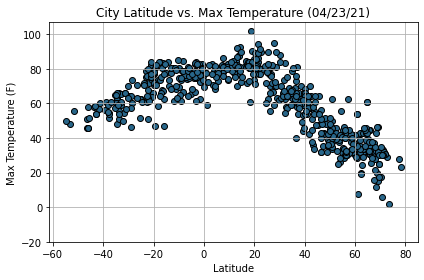

In [20]:
#scatterplot latitude vs. max temp
x_values = city_df['Lat']
y_values = city_df['Max Temp']
y_ticks = np.arange(-20, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Max Temperature (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_maxtemp.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

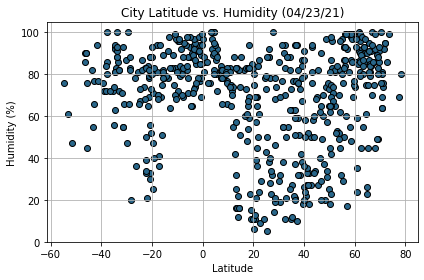

In [21]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Humidity']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Humidity (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_humidity.png")

#show plot
plt.show()

## Latitude vs. Cloudiness Plot

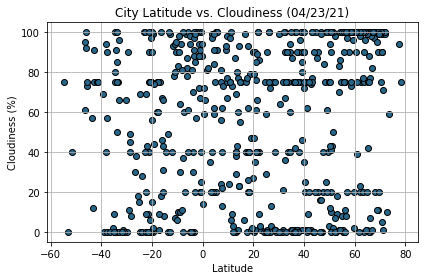

In [22]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Cloudiness (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_cloudiness.png")

#show plot
plt.show()

## Latitude vs. Wind Speed Plot

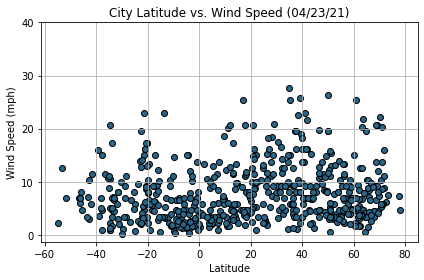

In [23]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
y_ticks = np.arange(0, 50, 10)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Wind Speed (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_cloudiness.png")

#show plot
plt.show()

## Linear Regression

In [24]:
#separate into northern and southern hemispheres
northern_df = city_df[city_df['Lat'] >= 0]
southern_df = city_df[city_df['Lat'] < 0 ]

####  Northern Hemisphere - Latitude vs. Max Temp Linear Regression 

The r-value is: -0.8867288760206298


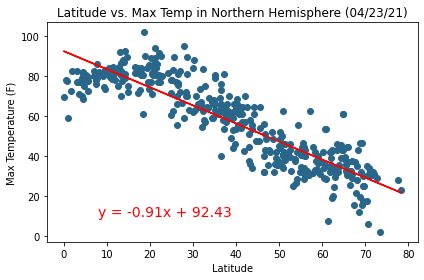

In [25]:
#scatterplot latitude vs. max temp
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Max Temp in Northern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (8,10), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_maxtemp_regress.png")

#show plot
plt.show()

####  Southern Hemisphere - Latitude vs. Max Temp Linear Regression

The r-value is: 0.7200510685768275


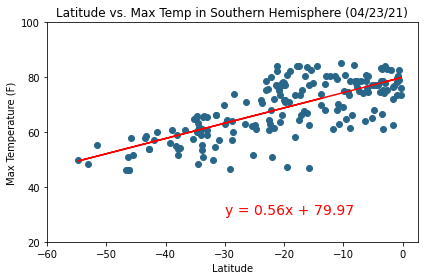

In [26]:
#scatterplot latitude vs. max temp
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
y_ticks = np.arange(20, 120, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Max Temp in Southern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-30,30), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_maxtemp_regress.png")

#show plot
plt.show()

####  Northern Hemisphere - Latitude vs. Humidity (%) Linear Regression

The r-value is: 0.14312236625867344


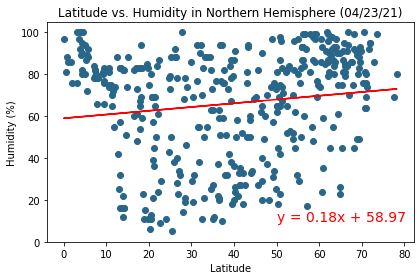

In [27]:
#scatterplot latitude vs. humidity
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Humidity in Northern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (50,10), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_humidity_regress.png")

#show plot
plt.show()

####  Southern Hemisphere - Latitude vs. Humidity (%) Linear Regression

The r-value is: 0.20255237069461293


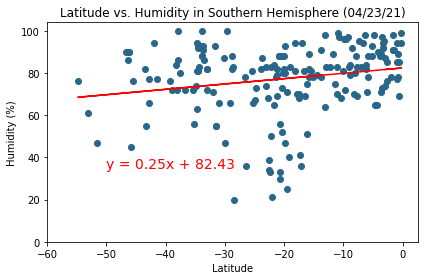

In [28]:
#scatterplot latitude vs. humidity
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
y_ticks = np.arange(0, 110, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Humidity in Southern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-50,35), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_humidity_regress.png")

#show plot
plt.show()

####  Northern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

The r-value is: 0.15140721648653638


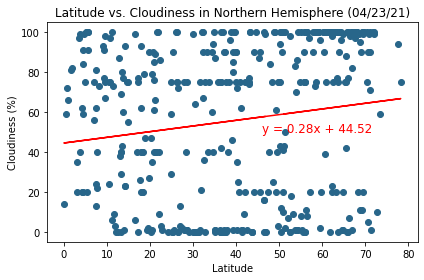

In [36]:
#scatterplot latitude vs. cloudiness
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Cloudiness in Northern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (46,50), fontsize=12, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_cloudiness_regress.png")

#show plot
plt.show()

####  Southern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

The r-value is: 0.15246813502137324


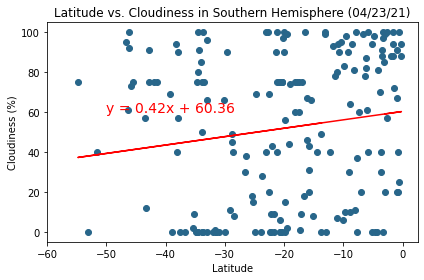

In [30]:
#scatterplot latitude vs. cloudiness
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Cloudiness in Southern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-50,60), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_cloudiness_regress.png")

#show plot
plt.show()

####  Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

The r-value is: 0.03481452519023741


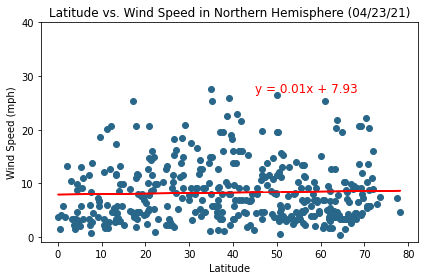

In [31]:
#scatterplot latitude vs. wind speed
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
y_ticks = np.arange(0, 50, 10)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Wind Speed in Northern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (45,27), fontsize=12, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_wind_regress.png")

#show plot
plt.show()

####  Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

The r-value is: -0.14306387666666992


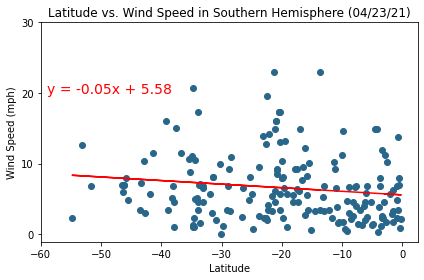

In [34]:
#scatterplot latitude vs. wind speed
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
y_ticks = np.arange(0, 40, 10)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Wind Speed in Southern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-59,20), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_wind_regress.png")

#show plot
plt.show()